 Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
#Importing keras package
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense


 Import the Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Explore the data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [9]:
len(test_labels)

10000

Preprocess the data

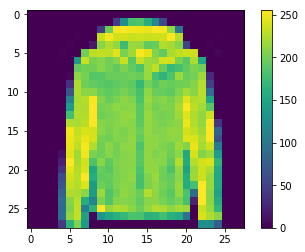

In [10]:
plt.figure()
plt.imshow(train_images[5000])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

displaying the image

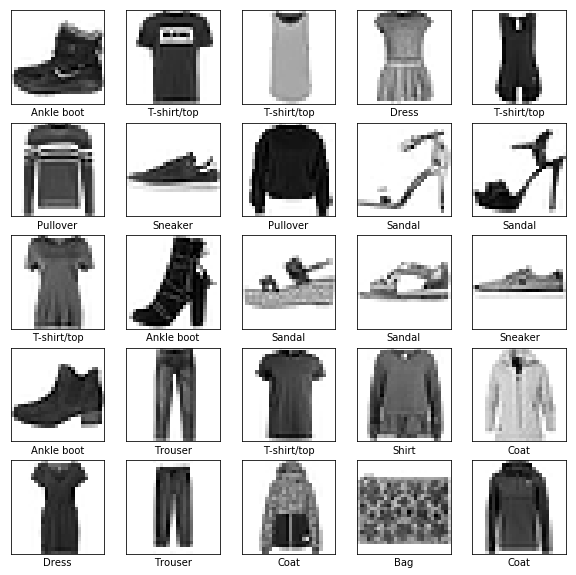

In [37]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary )
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Build the model

setup the layers

In [13]:
model=Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))

Compile the model

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Train the model

1.Feed the model

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.4988 - acc: 0.8245
Epoch 2/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.3750 - acc: 0.8656
Epoch 3/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.3383 - acc: 0.8770
Epoch 4/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.3137 - acc: 0.8845
Epoch 5/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2951 - acc: 0.8914
Epoch 6/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2821 - acc: 0.8963
Epoch 7/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2696 - acc: 0.9005
Epoch 8/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2586 - acc: 0.9038
Epoch 9/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.2506 - acc: 0.9066
Epoch 10/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.2397 - acc: 0.911

Evaluate accuracy

In [16]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('Test accuracy:',test_acc)

Test accuracy: 0.8838


Make predictions

In [18]:
prediction=model.predict(test_images)

In [39]:
prediction[12]

array([1.4482774e-07, 1.3194446e-10, 4.2880277e-09, 1.5620257e-08,
       4.2687304e-08, 9.3196732e-01, 1.1490316e-08, 6.0291551e-02,
       7.7408678e-03, 1.1627573e-07], dtype=float32)

the prediction is an arrya of 10 numbers, each numbers represents confidence of each class labels, and the label which has highest value of confidence is the label of that item. 

selecting label with maximum confidence using argmax.

In [40]:
np.argmax(prediction[12])

5

Test the classification

In [38]:
test_labels[12]

7

Graph this to look at the full set of 10 class predictions

In [32]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

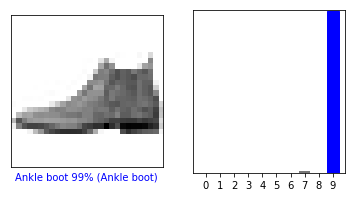

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

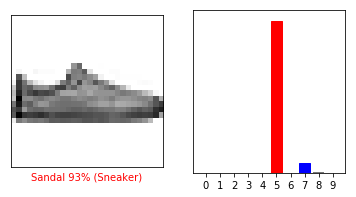

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

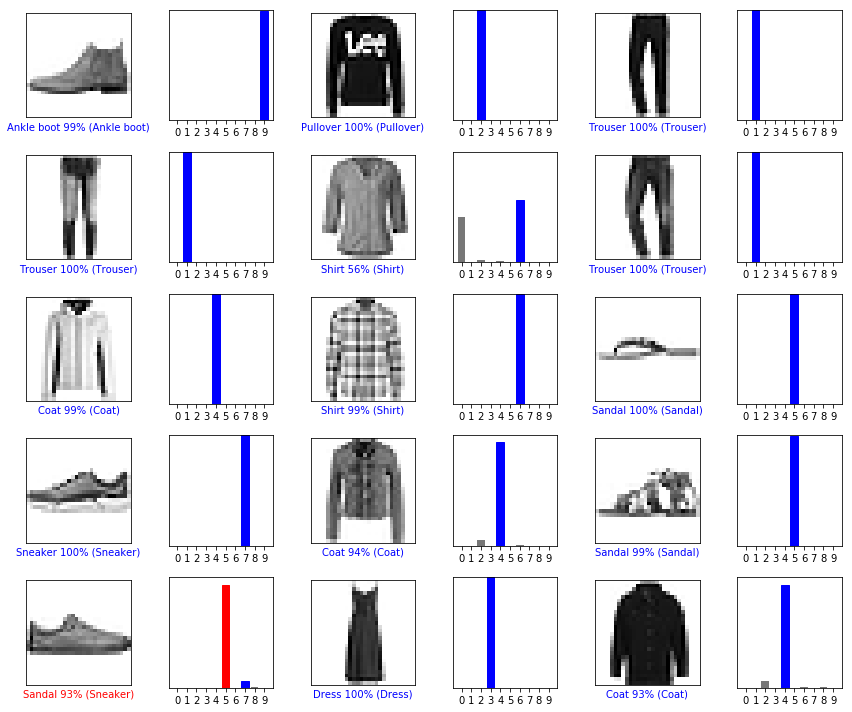

In [41]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_labels)
plt.tight_layout()
plt.show()

Use the trained model

In [42]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [43]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [44]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.4915582e-05 1.1063471e-14 9.9925679e-01 3.9690950e-12 4.2691972e-04
  1.3430035e-12 2.9133781e-04 2.1540124e-19 1.9125192e-10 4.2989468e-16]]


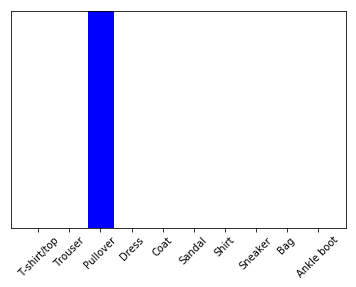

In [47]:
plot_value_array(1np.argmax(predictions_single[0]), predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [48]:
np.argmax(predictions_single[0])

2